# Path

In [1]:
import os
os.chdir("/home/seojin/HR/student_data_analysis")
import prj_info

raw_data_dir_path = os.path.join(prj_info.prj_home_path, "raw_data") # where is the directory which the grade data is existed.
preprocessed_dir_path = os.path.join(prj_info.prj_home_path, "preprocessed") # where is the directory for saving student_input_data.

exploratory_dir_path = os.path.join(prj_info.prj_home_path, "Exploratory") # where is the directory for saving explanatory plot.

log_dir_path = os.path.join(prj_info.prj_home_path, "tb_log") # where is the directory for saving tensorboard log while training model.

model_dir_path = "/mnt/sdb2/seojin/st_p" # where is the directory for saving models

# import

In [2]:
# data processing
import pandas as pd
pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

from pandas import DataFrame as df
import numpy as np
import itertools
import re
from collections import Counter
import openpyxl
from scipy.stats import zscore
# data processing

# visualization
import pyvis
import matplotlib.pylab as plt
%matplotlib inline
# visualization

# ml
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle
# ml

# torch
import torch.optim as optim
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
# torch

# others
from matplotlib import font_manager
import time
# others

In [3]:
nanum_font_list = font_manager.findSystemFonts(fontpaths='/usr/share/fonts/truetype/')
for font in nanum_font_list:
    if 'Nanum' in font:
        print(font)
fontprop = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumSquareR.ttf", size=10)

/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
/usr/share/fonts/truetype/nanum/NanumSquare_acR.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoR.ttf
/usr/share/fonts/truetype/nanum/NanumSquare_acB.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
/usr/share/fonts/truetype/nanum/NanumBrush.ttf
/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
/usr/share/fonts/truetype/nanum/NanumSquare_acL.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
/usr/share/fonts/truetype/nanum/Na

# Custom library

In [4]:
import sys
sys.path.append(prj_info.module_path)

import sj_higher_function
from sj_higher_function import recursive_map, flatten, relation_map, relation_df
import sj_preprocessing as preproc
from sj_preprocessing import get_column_keywords, reverse_dict, search_multi_conditions, is_nan, is_not_nan, to_series, get_columns_keywords, search, group, compare_df, search_column_index, change_df, replace_str, one_hot_encoding, one_hot_encodings, remove_non_need_column
import sj_sequence as ss
import sj_file_system
from sj_file_system import str_join
import sj_ml
import F_Visualize

# Common constant

In [5]:
access_first_entry = 0

is_use_numerical_target = True

# Constant

In [24]:
"""
# sas data
input_path = None

target_block = "RJ"
target_middle_chapter = 14044200
specific_prefix = 0

remove_s = True
is_use_sas = True
"""

'\n# sas data\ninput_path = None\n\ntarget_block = "RJ"\ntarget_middle_chapter = 14044200\nspecific_prefix = 0\n\nremove_s = True\nis_use_sas = True\n'

# input이 있는 경우

In [25]:
target_block = None
target_middle_chapter = None

is_use_sas = False # sas 데이터
is_use_experiment_data = False # 실험 데이터
is_use_rev = False # rev 데이터
is_remove_S = True # if True, Label 예측에 직접적으로 영향을 미치는 feature을 제거

input_path = "/home/seojin/HR/student_data_analysis/raw_data/RJ_중2_2204A100.xlsx"

target_block = input_path.split("/")[-1].split("_")[0]
try:
    target_middle_chapter = int(input_path.split("/")[-1].split("_")[-1].split(".")[0])
except:
    target_middle_chapter = str(input_path.split("/")[-1].split("_")[-1].split(".")[0])
specific_prefix = target_block


# Prefix

In [8]:
def prefix(target_block, target_middle_chapter, target_layer = None):
    data_type = ""
    if input_path is not None:
        data_type = specific_prefix
    elif is_use_sas:
        data_type = "sas"
    
    remove_s = ""
    if is_remove_S:
        remove_s = "removeS"
    
    join_strs = []
    if data_type != "":
        join_strs.append(data_type)
    
    join_strs.append(target_block)
    join_strs.append(str(target_middle_chapter))
    
    if target_layer != None:
        join_strs.append(target_layer)
    
    if remove_s != "":
        join_strs.append(remove_s)

    return str_join(join_strs)
    

# File Names

In [9]:
data_generation_file_name = "data generation(RJ_14044200).xlsx"

data_raw_including_path_index_info = {
    "1 grade" : 0,
    "2 grade" : 1,
    "3 grade" : 2,
    "4 grade" : 3,
    "5 grade" : 4,
    "6 grade" : 5,
    "7 grade" : 6,
    "8 grade" : 7,
    "9 grade" : 8,
}

data_sas_raw_file_names = [
    "lb_1_sas.xlsx",
    "lb_2_sas.xlsx",
    "lb_3_sas.xlsx",
    "lb_4_sas.xlsx",
    "lb_5_sas.xlsx",
    "lb_6_sas.xlsx",
    "lb_7_sas.xlsx",
    "lb_8_sas.xlsx",
    "lb_9_sas.xlsx"
]


# Hard Code

In [10]:
label_category = {
    "Non Mastery" : 0,
    "Partial Mastery" : 1, 
    "Mastery" : 2
}
label_category_reverse = reverse_dict(label_category)

grade_column_names = [
    ("no", "", "", ""),
    ("no_raw", "", "", ""),
    ("학생코드", "", "", ""),
    ("중단원", "", "", ""),
    ("지식", "", "", ""),
    ("지식단계", "", "", ""),
    ("path", "", "", ""),
    ("판본", "", "", ""),
    ("Cognitive Domain", "습(S1)", "개념원리(E)", "출제횟수"),
    ("Cognitive Domain", "습(S1)", "개념원리(E)", "정답수"),
    ("Cognitive Domain", "습(S1)", "개념적용(B)", "출제횟수"),
    ("Cognitive Domain", "습(S1)", "개념적용(B)", "정답수"),
    ("Cognitive Domain", "습(S1)", "개념활용(C)", "출제횟수"),
    ("Cognitive Domain", "습(S1)", "개념활용(C)", "정답수"),
    
    ("Cognitive Domain", "연(S2)", "개념원리(E)", "출제횟수"),
    ("Cognitive Domain", "연(S2)", "개념원리(E)", "정답수"),
    ("Cognitive Domain", "연(S2)", "개념적용(B)", "출제횟수"),
    ("Cognitive Domain", "연(S2)", "개념적용(B)", "정답수"),
    ("Cognitive Domain", "연(S2)", "개념활용(C)", "출제횟수"),
    ("Cognitive Domain", "연(S2)", "개념활용(C)", "정답수"),
    
    ("Cognitive Domain", "측(S3): 자료전달(지식별 문항수)", "개념원리(E)", "출제횟수"),
    ("Cognitive Domain", "측(S3): 자료전달(지식별 문항수)", "개념원리(E)", "정답수"),
    ("Cognitive Domain", "측(S3): 자료전달(지식별 문항수)", "개념적용(B)", "출제횟수"),
    ("Cognitive Domain", "측(S3): 자료전달(지식별 문항수)", "개념적용(B)", "정답수"),
    ("Cognitive Domain", "측(S3): 자료전달(지식별 문항수)", "개념활용(C)", "출제횟수"),
    ("Cognitive Domain", "측(S3): 자료전달(지식별 문항수)", "개념활용(C)", "정답수"),
    ("Cognitive Domain", "측(S3): 자료전달(지식별 문항수)", "유형응용(A)", "출제횟수"),
    ("Cognitive Domain", "측(S3): 자료전달(지식별 문항수)", "유형응용(A)", "정답수"),
    
    ("Direction(범위)", "지식 이해 상태", "", ""),
    ("Direction(범위)", "이상 반응", "", ""),
    ("Direction(범위)", "θ THETA", "", ""),
    ("Direction(범위)", "표준오차(SE)", "", ""),
    ("Direction(범위)", "USER LEVEL", "", ""),
    ("Direction(범위)", "TRUE SCORE", "", ""),
    ("Direction(범위)", "이질성 계수 ZETA", "", ""),
    ("Direction(범위)", "백분위 점수", "", ""),
    ("Direction(범위)", "RISING SCORE", "", ""),
    ("Direction(범위)", "동일집단 평균점수", "", ""),
    
    ("Knowledge Tracing(K1)", "", "개념원리(E)", "출제횟수"),
    ("Knowledge Tracing(K1)", "", "개념원리(E)", "정답수"),
    ("Knowledge Tracing(K1)", "", "개념적용(B)", "출제횟수"),
    ("Knowledge Tracing(K1)", "", "개념적용(B)", "정답수"),
    ("Knowledge Tracing(K1)", "", "개념활용(C)", "출제횟수"),
    ("Knowledge Tracing(K1)", "", "개념활용(C)", "정답수"),
    
    ("개념원리정답율", "", "", ""),
    ("개념적용정답율", "", "", ""),
    ("개념활용정답율", "", "", ""),
    
    ("(S1+S2+S3+K1) 출제횟수", "", "", ""),
    ("(S1+S2+S3+K1) 정답수", "", "", ""),
    ("(S1+S2+S3+K1) 정답율", "", "", ""),
    
    ("LEARNING BASED AI(L1) (Small Step 지식별 문항수)", "", "개념원리(E)", "출제횟수"),
    ("LEARNING BASED AI(L1) (Small Step 지식별 문항수)", "", "개념원리(E)", "정답수"),
    ("LEARNING BASED AI(L1) (Small Step 지식별 문항수)", "", "개념적용(B)", "출제횟수"),
    ("LEARNING BASED AI(L1) (Small Step 지식별 문항수)", "", "개념적용(B)", "정답수"),
    ("LEARNING BASED AI(L1) (Small Step 지식별 문항수)", "", "개념활용(C)", "출제횟수"),
    ("LEARNING BASED AI(L1) (Small Step 지식별 문항수)", "", "개념활용(C)", "정답수"),
    
    ("(S1+S2+S3+K1+L1) 출제횟수", "", "", ""),
    ("(S1+S2+S3+K1+L1) 정답수", "", "", ""),
    ("(S1+S2+S3+K1+L1) 정답율", "", "", ""),
    
    ("학습한 지식", "", "", ""),
    ("결론", "", "", ""),
]


In [11]:
def summary_columns(column_names):
    new_column_names = []
    for column_name in column_names:

        # 축약
        new_column_name = list(column_name)
        for i in range(0, len(column_name)):
            name = column_name[i]
            if name == "Cognitive Domain" or name == "Direction(범위)":
                new_column_name[i] = ""
            elif "(S1+S2+S3+K1)" in name:
                new_column_name[i] = "부분 "+  name.split(" ")[1] + " c[L1]"
            elif "(S1+S2+S3+K1+L1)" in name:
                new_column_name[i] = "총 "+  name.split(" ")[1]

        # (~)검출
        for i in range(0, len(column_name)):
            name = column_name[i]
            summary_test = re.search("\([A-Z]{1}\d?\)", name)
            if summary_test == None:
                continue
            else:
                summary_txt = summary_test.group()
                new_column_name[i] = summary_txt

        # 마지막 간추리기
        new_column_name = str_join(new_column_name, " / ")

        # 추가
        new_column_names.append(new_column_name)
    return new_column_names


# Class

In [12]:
class DNN(nn.Module):
    def __init__(self, 
                 input_shape, 
                 output_shape,
                 learning_rate=0.001,
                 is_gpu=False,
                 ):
        super(DNN, self).__init__()
        
        # Layers
        self.input_shape = input_shape
        self.output_shape = output_shape
        
        self.fc1 = nn.Linear(input_shape, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, output_shape)
        
        # hyperparameters
        self.learning_rate = learning_rate
        self.is_gpu = is_gpu
        
        # optimization
        self.criterion = nn.CrossEntropyLoss()

        self.optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)
        
        # GPU
        if self.is_gpu and torch.cuda.is_available():
            self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
            self.to(self.device)
        else:
            self.device = torch.device("cpu")

    def forward(self, x):
        x = x.float()
        x = F.relu(self.fc1(x.view(-1, self.input_shape)))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.log_softmax(self.fc6(x), dim=1)
        return x
    
    def partial_fit(self, X_train, y_train):
        self.train()
        
        data_count = len(y_train)

        X = X_train
        Y = y_train
            
        self.optimizer.zero_grad()
        #loss = F.cross_entropy(self(X), Y)
        #loss.backward()
        self.criterion(self(X), Y).backward()
        
        self.optimizer.step()
    
    def predict(self, X):
        return torch.argmax(self.forward(X), axis=1)
        
    def df_to_tensor(self, df):
        return torch.tensor(df.values).float()
        
    def is_use_gpu(self):
        return self.is_gpu
    
    def is_use_tensor(self):
        return True
    
    def get_device(self):
        return self.device
        
    def is_partial_fit(self):
        return True

class SGD_C:
    def __init__(self, classes):
        self.model = SGDClassifier(loss="hinge", shuffle=True)
        self.classes = classes
        
    def partial_fit(self, X_train, y_train):
        self.model.partial_fit(X_train, y_train, self.classes)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def is_partial_fit(self):
        return True
    
    def is_use_tensor(self):
        return False
    
class SVM:
    def __init__(self, kernel, C = None):
        if C != None:
            self.model = SVC(kernel=kernel, C=C)
        else:
            self.model = SVC(kernel=kernel, C=C)
            
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def is_partial_fit(self):
        return False
    
    def is_use_gpu(self):
        return False
    
    def is_use_tensor(self):
        return False

# Function

## Exploaratory Analysis function

In [13]:
def mapping_no_raw_to_knowledge(grade_datas, data_index_info):
    for grade in data_index_info.keys():
        d = grade_datas[data_index_info[grade]]

        print("grade: ", grade)
        print(relation_map(X=get_single_col(d, keyword1="지식단계", mode=1),
                                             Y=get_single_col(d, keyword1="no_raw", mode=1)))
        print("")
        
def relation_knowledge(grade_datas, data_index_info):
    relations = []
    for grade in data_index_info.keys():
        d = grade_datas[data_index_info[grade]]

        relation = relation_map(
            X=get_single_col(d, keyword1="지식단계"),
            Y=get_single_col(d, keyword1="학습한 지식")
        )
        relations.append(relation)
        
def student_count(grade_datas, data_index_info):
    for grade in data_index_info.keys():
        data = grade_datas[data_index_info[grade]]

        student_code = get_col(data, keyword1="학생코드", mode=0)
        print(grade, np.unique(student_code.value_counts()))

## Data functions

In [14]:
def load_student_info(layer_info, data_index_info):
    st_input_info = {}
    for block in layer_info.keys():
        st_input_info[block] = {}
        for middle_chapter in layer_info[block]:
            student_input_datas = []
            for target_grade in data_index_info.keys():
                # load student input data
                student_input_data = pd.read_excel(os.path.join(preprocessed_dir_path, str_join([data_prefix(), "판본", block, "중단원", str(middle_chapter), target_grade, "student_input.xlsx"])), 
                                                   header=[0,1,2,3,4])
                header = pd.MultiIndex.from_tuples(recursive_map(list(student_input_data.columns.to_numpy()), lambda x: "" if type(x) == str and "Unnamed" in x else x))
                student_input_data.columns = header
                student_input_data = student_input_data.iloc[1:]

                # add student code header
                headers = []
                for i in range(0, len(student_input_data.columns)):
                    if i == 0:
                        headers.append(("student_code", "", "", "", ""))
                    else:
                        headers.append(student_input_data.columns[i])

                student_input_data.columns = pd.MultiIndex.from_tuples(headers)
                
                target_train_layers = get_higher_layer_info(layer_info, target_block, target_middle_chapter)[target_block][target_middle_chapter]

                for t_l in target_train_layers:                    
                    # self 자기자신
                    student_input_data = change_df(student_input_data,
                                                       column_name = [t_l, "studied " + t_l, "", "", ""], 
                                                       apply_func = lambda element: 1 if element == 0 else element)
                
                # Apped
                student_input_datas.append(student_input_data)

            st_input_info[block][middle_chapter] = student_input_datas
    return st_input_info

def get_higher_layer_info(layer_info, block, middle_chapter):
    higher_layer_info = {}
    higher_layer_info[block] = {}
    higher_layer_info[block][middle_chapter] = get_layers(layer_info[block][middle_chapter])[0]

    return higher_layer_info



## Drawing

In [15]:
def training_count(datasets, target_layer):
    y_train_data = datasets[target_layer]["y_train"]

    print("Unique labels: ", np.unique(y_train_data))

    if is_use_numerical_target:
        plt.hist(y_train_data)
        plt.xticks(np.unique(y_train_data), [label_category_reverse[code] for code in np.unique(y_train_data)])
        plt.title("Training count")

        print("ratio: ", [sum(np.array(y_train_data) == code) / len(y_train_data) for code in label_category_reverse.keys()])
    else:
        plt.hist(y_train_data)
        plt.xticks([0,1,2], list(label_category.keys()))
        plt.title("Training count")

        print("ratio: ", [sum(np.array(y_train_data) == ct) / len(y_train_data) for ct in list(label_category.keys())])
        None

def draw_accuracy(model, acc_type="ep_train_acc", figsize = (5,5)):
    plt.clf()
    # acc_type: ep_train_acc, batch_train_acc, ep_test_acc, batch_test_acc
    legends = ""
    dict_accs = {}
    if "train" in acc_type:
        dict_accs = model.train_acc
    else:
        dict_accs = model.test_acc
    accs = [float(e) for e in dict_accs[acc_type]]
    
    plt.figure(figsize=figsize)
    plt.plot(np.arange(0, len(accs)), accs)
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend([acc_type])
    
    split_prefix = model.prefix.split("_")
    for i in range(0, len(split_prefix)):
        if split_prefix[i].startswith("L"):
            level_i = i
    title = str_join([model.name, str_join(split_prefix[level_i:level_i+2])])
    plt.title(title)
    # plt.savefig(os.path.join(prj_info.prj_home_path, title + "_" + acc_type), dpi=300, bbox_inches='tight')
    plt.show()
    
def show_result(model, target_high_feature_range, target_mastery_index, target_layer, xmin= 0, xmax=100):
    print("")
    categories = list(label_category.keys())
    print(categories[target_mastery_index] + " /////////////////////////////////////////////////////////")
    
    # select column
    columns = summary_columns(model.X_train.columns)
    target_column_indexes = []
    for i in range(0, len(columns)):
        if "총" in columns[i]:
            target_column_indexes.append(i)
    target_columns = np.array(columns)[target_column_indexes]
    
    # coef
    target_coef = model.model.model.coef_[target_mastery_index]
    target_coef = target_coef[target_column_indexes]
    
    # sort
    target_feature_indexes = np.flip(np.argsort(target_coef))
    
    # slicing
    target_ranged_feature_indexes = target_feature_indexes[target_high_feature_range]
    target_high_feature_values = list(map(lambda h_f_i: target_coef[h_f_i], target_ranged_feature_indexes))

    # graph
    plt.title(target_layer + " " + categories[target_mastery_index])
    F_Visualize.f_importances(target_high_feature_values,
                              np.repeat("", len(target_high_feature_values)))
    plt.xlabel("coef")
    plt.ylabel("feature")
    
    # column name
    sort_target_columns = []
    count = 0
    for h_f_i in target_ranged_feature_indexes:
        print("order: " + str(count), "/", target_columns[h_f_i])
        count += 1
        sort_target_columns.append(target_columns[h_f_i])
    
    print(sort_target_columns)
    
    # 주의 
    yticks = np.sort(list(range(0,10)))[::-1]

    plt.yticks(yticks, sort_target_columns, fontproperties=fontprop)

    plt.xlim([xmin, xmax])
    plt.xticks(np.arange(xmin, xmax, 5), np.arange(xmin, xmax, 5))
    
    # plt.savefig(os.path.join(prj_info.prj_home_path, target_layer + "_" + "SVM_coef" + "_" + label_category_reverse[target_mastery_index]), dpi=300, bbox_inches='tight')

def add_node(knowledge, is_use_code, layer_level_to_code):
    if is_nan(knowledge):
        return
    
    layer_code_to_level = reverse_dict(layer_level_to_code)
    
    colors = ["FF0000", "FFC133", "3FFF33", "3333FF"]
    
    target_layers = []
    if is_use_code:
        target_layers = recursive_map(get_layers(layer_level_to_code), 
                                      lambda x: layer_level_to_code[x])
    else:
        target_layers = get_layers(layer_level_to_code)
        
    for layer_i in range(0, len(target_layers)):
        if knowledge in target_layers[layer_i]:
            net.add_node(knowledge, color=colors[layer_i])

def add_edge(source, to):
    if is_nan(source) or is_nan(to):
        return
    net.add_edge(source=source, to=to)
    
def draw_knowledge_link(is_use_code, layer_level_to_code):
    layer_code_to_level = reverse_dict(layer_level_to_code)
    
    def name(code):
        if is_nan(code):
            return np.nan
    
        return code if is_use_code else layer_code_to_level[int(code)]
    
    set_link_knowledge = dict(knowledge_and_link.values)
    set_link_knowledge = {str(key): str(value) for key, value in set_link_knowledge.items()}
    for knowledge in set_link_knowledge:
        upper_knowledges = set_link_knowledge[knowledge]
        
        add_node(name(knowledge), is_use_code, layer_level_to_code)

        if " and " in upper_knowledges:
            for up_knowledge in upper_knowledges.split(" and "):
                add_node(name(up_knowledge), is_use_code, layer_level_to_code)
                add_edge(name(knowledge), name(up_knowledge))
        else:
            add_node(name(upper_knowledges), is_use_code, layer_level_to_code)
            add_edge(name(knowledge), name(upper_knowledges))

    # Last node
    #last_node = layers[0][0]
    #add_node(last_node)
    #for knowledge in layers[1]:
    #    add_edge(knowledge, last_node)
    return net

def data_distribution(grade_datas, target_middle_chapter, data_index_info):
    target_grade_datas = list(map(lambda x: search(x, [["중단원", "", "", ""]], [lambda middle_chapter: middle_chapter == target_middle_chapter]), grade_datas))

    plt.title(str_join([target_block, str(target_middle_chapter)]))

    plt.bar(list(data_index_info.keys()), list(map(lambda x: len(x), target_grade_datas)))
    plt.xticks(rotation=45)
    plt.ylabel("Data Count")

    # plt.savefig(os.path.join(exploratory_dir_path, str_join([target_block, str(target_middle_chapter), "data_count"]) + ".png"), dpi=300, bbox_inches='tight')

def student_distribution(grade_datas, target_middle_chapter, layer_info, data_index_info):
    target_grade_datas = list(map(lambda x: search(x, [["중단원", "", "", ""]], [lambda middle_chapter: middle_chapter == target_middle_chapter]), grade_datas))
    
    knowledge_count = len(layer_info[block][target_middle_chapter])
    n_student_info = dict(zip(list(data_index_info.keys()), list(map(lambda x: int(len(x) / knowledge_count), target_grade_datas))))

    plt.title(str_join([target_block, str(target_middle_chapter)]))
    plt.bar(n_student_info.keys(), n_student_info.values())
    plt.xticks(rotation=45)
    plt.ylabel("number of student")
    
    # plt.savefig(os.path.join(exploratory_dir_path, str_join([target_block, str(target_middle_chapter), "student_count"]) + ".png"), dpi=300, bbox_inches='tight')

## Preprocessing

In [16]:
def fill_na(student_data):
    columns = summary_columns(student_data.columns)
    target_column_indexes = []
    for i in range(0, len(columns)):
        if "개념원리정답율" in columns[i] or "개념적용정답율" in columns[i] or "개념활용정답율" in columns[i]:
            target_column_indexes.append(i)
        
    for c_index in target_column_indexes:
        student_data.iloc[:, c_index] = student_data.iloc[:, c_index].fillna(-1)

    return student_data

def preprocessing_student_input_data(student_input_data, higher_layers):
    #is_remove_S일 경우에만 의미 있음
    if is_remove_S:
        non_need_L0_columns = [
            ["(S1+S2+S3+K1) 출제횟수", "", "", ""],
            ["(S1+S2+S3+K1) 정답수", "", "", ""],
            ["(S1+S2+S3+K1) 정답율", "", "", ""],
            ["(S1+S2+S3+K1+L1) 출제횟수", "", "", ""],
            ["(S1+S2+S3+K1+L1) 정답수", "", "", ""],
            ["(S1+S2+S3+K1+L1) 정답율", "", "", ""],
            ['개념원리정답율','','',''],
            ['개념적용정답율','','',''],
            ['개념활용정답율','','',''],
            ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '출제횟수'],
            ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)',  '정답수'],
            ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념적용(B)', '출제횟수'],
            ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념적용(B)',  '정답수'],
            ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념활용(C)', '출제횟수'],
            ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념활용(C)',  '정답수'],
        ]
    else:
        non_need_L0_columns = []
    
    search_non_need_column_indexes = []
    # for knowledge_level in layer_info[block][target_middle_chapter].keys(): # 전체
    for knowledge_level in higher_layers: # Higher layer만 전처리
        for column in non_need_L0_columns:
            search_non_need_column_indexes.append(list(search_column_index(student_input_data,
                                                                           keywords = [knowledge_level] + column)))
            search_non_need_column_indexes = flatten(search_non_need_column_indexes)
            print("remove ", knowledge_level, column)
            
    # Extract need index
    need_indexes = []
    col_indexes = np.arange(0, len(student_input_data.columns))
    for col_index in col_indexes:
        if col_index not in search_non_need_column_indexes:
            need_indexes.append(col_index)

    return student_input_data.iloc[:, need_indexes]

def make_input_data(data, block, middle_chapter):
    count = 0
    result_df = None
    
    for student_code, group in data.groupby("학생코드"):
        data_count = len(layer_info[block][middle_chapter])
        for start_i in range(0, len(group), data_count):
            student_df_ = make_student_input(group.iloc[start_i:start_i + data_count], block, middle_chapter)
            if type(result_df) == None:
                result_df = student_df_
            else:
                result_df = pd.concat([result_df, student_df_], axis=0)

        if count % 100 == 0:
            print("processing: ", count, "/", len(data)/data_count)
            
        count += 1
        
    return result_df

def make_single_level_input(one_row_, target_layers, debug=False):
    if type(one_row_) == pd.Series:
        one_row = pd.DataFrame(one_row_).T
        
    assert len(one_row) == 1, "Please input one row!!"

    one_row = one_row.copy()
    
    access_first_entry = 0
    
    # access knowledge level
    knowledge_level = get_col(one_row, keyword1="지식단계").iloc[access_first_entry, access_first_entry]
    
    # access student code
    student_code = get_col(one_row, keyword1="학생코드").iloc[access_first_entry, access_first_entry]
    
    # remove non need data
    all_column_indexes = list(np.arange(0, len(one_row.columns)))
    
    non_need_columns = []

    non_need_columns = [
        ["no", "", "", ""],
        ["no_raw", "", "", ""],
        ["학생코드", "", "", ""],
        ["지식", "", "", ""],
        ["지식단계", "", "", ""],
        ["학습한 지식", "", "", ""],
        ["path", "", "", ""],
        ["판본", "", "", ""]
    ]

    non_need_column_indexes = []
    for non_need_column in non_need_columns:
        non_need_column_indexes += list(search_column_index(one_row, keywords=non_need_column))

    for non_need_index in non_need_column_indexes:
        all_column_indexes.remove(non_need_index)

    result = one_row.iloc[:, all_column_indexes]
    
    
    # Add Level column
    new_columns = list(map(lambda column: (knowledge_level, column[0], column[1], column[2], column[3]), list(result.columns)))
    result.columns = pd.MultiIndex.from_tuples(new_columns)

    # Add studied knowledge one-hot encoding
    studied_knowledge = one_hot_encoding(string=get_col(one_row, keyword1="학습한 지식").iloc[access_first_entry, access_first_entry], 
                                         split_str=" ",
                                         variables=target_layers)
    
    studied_columns = list(map(lambda studied_level: (knowledge_level, "studied " + studied_level, "", "", ""), studied_knowledge))
    studied_knowledge.columns = pd.MultiIndex.from_tuples(studied_columns)
    studied_knowledge.index = result.index
    result = pd.concat([result, studied_knowledge], axis=1)
    
    return result, student_code

def make_student_input(student_df_, block, middle_chapter, debug=False):
    assert len(np.unique(get_col(student_df_, keyword1="학생코드"))) == 1, "Multi student rows is inputted"
    
    student_df = student_df_.copy()
    
    for_merging = 0
    count = 0
    
    level_inputs = []
    for index, level_row in student_df.iterrows():
        level_input, student_code = make_single_level_input(level_row, list(layer_info[block][middle_chapter].keys()))
        
        level_input.index = [for_merging]
        level_inputs.append(level_input)
        
        if debug:
            print("processing: ",  count, "/", str(len(student_df)))
        count += 1
    
    result = pd.concat(level_inputs, axis=1).sort_index(axis=1,level=[0])
    result.index = [student_code]
    return result

def filter_data(student_data, higher_layers, label_level, is_use_self=False):
    # student code 삭제, 중단원 삭제
    processed_student_data = remove_non_need_column(student_data, non_need_keywords=[
        ["student_code", "", "", "", ""],
        ["", "중단원", "", "", ""]
    ])

    # 결론 삭제
    processed_student_data = remove_non_need_column(processed_student_data, non_need_keywords=[
        ["", "결론", "", "", ""]
    ])

    # 불필요 high layer 삭제
    remove_higher_layer = higher_layers.copy()
    if is_use_self:
        remove_higher_layer.remove(label_level)
        
    remove_layers = remove_higher_layer
    for remove_layer in remove_layers:
        # print("remove layer: ", remove_layer)
        processed_student_data = remove_non_need_column(processed_student_data, non_need_keywords=[
            [remove_layer, "", "", "", ""],
        ])

    # change . -> -1 
    changed_value = -1
    t_columns = processed_student_data.columns[processed_student_data.dtypes != np.float64]

    for col in t_columns:
        print("proc: . -> -1", col)
        processed_student_data = change_df(processed_student_data,
                  column_name = col, 
                  apply_func = lambda element: changed_value if element == "." else element)
    
    # 자기 자신 studied 데이터 0이면 1로
    processed_student_data = change_df(processed_student_data,
                  column_name = [label_level, "studied " + label_level, "", "", ""], 
                  apply_func = lambda element: 1 if element == 0 else element)
    
    # Fill na
    columns = summary_columns(processed_student_data.columns)
    target_column_indexes = []
    for i in range(0, len(columns)):
        if "개념원리정답율" in columns[i] or "개념적용정답율" in columns[i] or "개념활용정답율" in columns[i]:
            target_column_indexes.append(i)

    for c_index in target_column_indexes:
        print("fill na: ", columns[c_index])
        processed_student_data.iloc[:, c_index] = processed_student_data.iloc[:, c_index].fillna(-1)
        
    # processed_student_data = processed_student_data.fillna(-1)
    print("drop na: ", processed_student_data.columns[processed_student_data.isnull().any()])
    processed_student_data = processed_student_data.dropna(axis=1)

    return processed_student_data

def preprocessing1(data):
    # Preocessing nan
    data_ = change_df(data, column_name=["학습한 지식", "", "", ""], apply_func=lambda x: "" if is_nan(x) else x)
    
    studied_knowledge_replace = {
        "\t" : "",
        "." : "",
        "," : ""
    }
    
    # Processing consistent nan
    return change_df(data_,
                     column_name=["학습한 지식", "", "", ""], 
                     apply_func=lambda x: replace_str(entry=x,
                                                      replace_targets=list(studied_knowledge_replace.keys()), 
                                                      replace_results=list(studied_knowledge_replace.values())))

def proc_dataset(
    st_input_info,
    target_train_layers, 
      is_use_numerical_target=True, 
      select_grade = 0, 
      is_use_sampling = False, 
      is_use_shuffle = True,
      test_size_ratio = 0.2):
    
     # select_grade if 0, select All grades
    datasets = {}
    for target_layer in target_train_layers:
        model_prefix = str_join([prefix(target_block, target_middle_chapter, target_layer), "grade", str(select_grade), "sampling", str(is_use_sampling)])

        higher_layers = higher_layer_info[target_block][target_middle_chapter]

        # Preprocessing
        student_labels = []
        processed_student_input_datas = []
        for input_data in st_input_info[target_block][target_middle_chapter]:
            labels = to_series(get_columns_keywords(input_data, 
                                                keywords_list=[[target_layer, "결론", "", "", ""]])).tolist()
            student_labels.append(labels)

            processed_1 = preprocessing_student_input_data(input_data, 
                                             higher_layers= higher_layer_info[target_block][target_middle_chapter])

            processed_2 = filter_data(processed_1, higher_layers, target_layer, is_use_self=True)
            processed_student_input_datas.append(processed_2)

        datas = []
        for grade_i in range(0, len(processed_student_input_datas)):
            input_data = processed_student_input_datas[grade_i]
            labels = student_labels[grade_i]

            X_train, X_test, y_train, y_test = train_test_split(input_data, 
                                                                labels, 
                                                                test_size = test_size_ratio, 
                                                                random_state=0)

            if is_use_numerical_target:
                y_train = list(map(lambda label: label_category[label], y_train))
                y_test = list(map(lambda label: label_category[label], y_test))

            datas.append((X_train, X_test, y_train, y_test))

        x_train_index = 0
        x_test_index = 1
        y_train_index = 2
        y_test_index = 3

        #### Grade #####
        if select_grade == 0:
            x_train_data = pd.concat([data[x_train_index] for data in datas], axis=0)
            y_train_data = np.array(sj_higher_function.flatten_2d([data[y_train_index] for data in datas]))
            x_test_data = pd.concat([data[x_test_index] for data in datas], axis=0)
            y_test_data = np.array(sj_higher_function.flatten_2d([data[y_test_index] for data in datas]))
        else:
            data = datas[select_grade-1]
            x_train_data = data[x_train_index]
            y_train_data = np.array(data[y_train_index])
            x_test_data = data[x_test_index]
            y_test_data = np.array(data[y_test_index])

        # 분포가 없는 데이터 삭제
        std_values = x_train_data.describe(include='all').loc["std"]

        dist_columns = list(std_values[(std_values != 0)].index)
        nonDist_columns = list(std_values[(std_values == 0)].index)
        # Higher layer에서, studied column은 제거하지 않음
        not_remove_columns = list(filter(lambda column: True if column[0] in higher_layers and "studied" in column[1] else False, nonDist_columns))
        for e in not_remove_columns:
            nonDist_columns.remove(e)

        for nonD_c in nonDist_columns:
            print("remove nonDistcolumn: ", nonD_c)

        print("not remove: ", not_remove_columns)
        x_train_data = x_train_data.loc[:, dist_columns + not_remove_columns]
        x_test_data = x_test_data.loc[:, dist_columns + not_remove_columns]

        #### Mastery Sampling 균일하게 데이터 선택 #####
        if is_use_sampling:
            x_master_data = x_train_data[y_train_data == label_category["Mastery"]]
            y_master_data = y_train_data[y_train_data == label_category["Mastery"]]

            x_partial_master_data = x_train_data[y_train_data == label_category["Partial Mastery"]]
            y_partial_master_data = y_train_data[y_train_data == label_category["Partial Mastery"]]

            x_non_master_data = x_train_data[y_train_data == label_category["Non Mastery"]]
            y_non_master_data = y_train_data[y_train_data == label_category["Non Mastery"]]

            mastery_count = len(x_master_data)

            x_master_data = x_master_data.sample(n=mastery_count, replace=False)
            y_master_data = np.random.choice(y_master_data, mastery_count)

            x_partial_master_data = x_partial_master_data.sample(n=mastery_count, replace=False)
            y_partial_master_data = np.random.choice(y_partial_master_data, mastery_count)

            x_non_master_data = x_non_master_data.sample(n=mastery_count, replace=False)
            y_non_master_data = np.random.choice(y_non_master_data, mastery_count)

            x_train_data = pd.concat([x_master_data, x_partial_master_data, x_non_master_data], axis=0)
            y_train_data = np.r_[y_master_data, y_partial_master_data, y_non_master_data]

        # Shuffle
        if is_use_shuffle:
            x_train_data, y_train_data = shuffle(x_train_data, y_train_data)

        datasets[target_layer] = {
            "prefix" : model_prefix,
            "x_train" : x_train_data,
            "y_train" : y_train_data,
            "x_test" : x_test_data,
            "y_test" : y_test_data,
        }
    return datasets

## Study Strategy

In [17]:
def get_sub_study_path(model, target_sub_columns_names, alias_sub_column_name):
    # layers_level
    layers_level = sorted(layer_info[target_block][target_middle_chapter].items(), reverse=True)
    
    # target_layers_level
    target_layers_level = []
    for layer_level in layers_level:
        layer_level = layer_level[0]
        
        # higher layer는 SVM coef가 없으므로 제외
        if layer_level not in higher_layer_info[target_block][target_middle_chapter]:
            target_layers_level.append(layer_level)
    
    # select mastery
    target_mastery_index = label_category["Mastery"]
    
    # select column
    columns = summary_columns(model.X_train.columns)
    target_column_indexes = []

    for level in target_layers_level:
        for i in range(0, len(columns)):
            if level in columns[i] and sum([col in columns[i] for col in target_sub_columns_names]) >= 1:
                target_column_indexes.append(i)
    target_columns = np.array(columns)[target_column_indexes]
    
    # coef
    target_coef = model.model.model.coef_[target_mastery_index]
    target_coef = target_coef[target_column_indexes]
    
    # Extract coefficient
    coef_dic = {}
    for level in target_layers_level:
        coef_dic[level] = {}
        for coef in zip(target_columns, target_coef):
            coef_name = coef[0]
            coef_value = coef[1]
            if level in coef_name:
                coef_dic[level][coef_name.split(" / ")[1]] = coef_value
    
    # result
    result = {}
    for level in coef_dic.keys():
        coef_array = np.array([coef_dic[level][name] for name in target_sub_columns_names])
        
        max_coeff_i = np.argmax(coef_array)

        result[level] = alias_sub_column_name[max_coeff_i:len(target_sub_columns_names)]
    
    for level in coef_dic.keys():
        print(level, "/", str_join(result[level], deliminator=" -> "), ";")
        
    return coef_dic,result

def studied_pattern(data, model_type, target_v, mastery):
    predicts = dep_model(model_type=model_type, target_v=target_v, data=data)
    mastery_data = data[predicts == label_category[mastery]]
    studied_data = get_column_keywords(mastery_data, [target_v, "studied", "", "", ""], search_mode=0)
    studied_columns = studied_data.columns
    
    sort_c_is = []
    for t_c in sorted_knowledge:
        for c_i in range(0, len(studied_columns)):
            column = studied_columns[c_i]

            if t_c in column[1]:
                sort_c_is.append(c_i)
                break
    
    studied_data = studied_data.iloc[:, sort_c_is]
    
    if len(studied_data) == 0:
        return None
    
    pattern = Counter(studied_data.astype(int).astype(str).apply(lambda strs: str_join(strs, ""), axis=1))
    from operator import itemgetter
    
    return sorted(pattern.items(), key=itemgetter(1), reverse=True)

def get_grade_testData(test_data):
    test_data_length = {}
    for grade_i in range(0, len(st_input_info[target_block][target_middle_chapter])):
        test_data_length[grade_i+1] = int(len(st_input_info[target_block][target_middle_chapter][grade_i]) * test_size_ratio)
    
    grade_d = []
    for grade in test_data_length:
        start_i = sum([test_data_length[sub_g] for sub_g in range(grade - 1, 0, -1)])
        grade_d.append(test_data[start_i:start_i + test_data_length[grade]])
    return grade_d

def get_optim(grade_test, model_type, target_v, command):
    optim_index = 0
    second_index = 1
    
    select_index = 0
    if command == "optim":
        select_index = optim_index
    elif command == "second":
        select_index = second_index
    
    pattern_index = 0
    
    recommend_patterns = []
    for grade_i in range(0, len(grade_test)):
        grade = grade_i + 1
        
        if grade in [1,2,3]:
            pattern = studied_pattern(grade_test[grade_i], model_type, target_v, "Mastery")
            try:
                rt_pt = pattern[select_index][pattern_index]
            except: # 패턴이 없는 경우
                if len(recommend_patterns) == 0:
                    rt_pt = np.nan
                else:
                    rt_pt = recommend_patterns[-1]
        elif grade in [4,5,6,7,8,9]:
            
            stp1 = studied_pattern(grade_test[grade_i], model_type, target_v, "Mastery")
            stp2 = studied_pattern(grade_test[grade_i], model_type, target_v, "Partial Mastery")

            if stp1 != None:
                stp1_c = stp1.copy()

            if stp2 != None:
                stp2_c = stp2.copy()

            if stp1 is None and stp2 is None:
                result = None
            elif stp1 is None:
                result = stp2    
            elif stp2 is None:
                result = stp1
            else: # 패턴 병합
                result = []
                for p1 in stp1:
                    for p2 in stp2:
                        if p1[0] == p2[0]:
                            result += [(p1[0], p1[1] + p2[1])]
                            stp1_c.remove(p1)
                            stp2_c.remove(p2)

                result += stp1_c
                result += stp2_c
            
            patterin_index = 0
            count_index = 1    
            try:
                rt_pt = result[select_index][patterin_index]
            except:
                try:
                    if select_index == 0:
                        rt_pt = recommend_patterns[-1]
                    else:
                        rt_pt = np.nan
                except:
                    rt_pt = np.nan
                
        recommend_patterns.append(rt_pt)
        
    return recommend_patterns

def get_recommand(grade_test, model_type, target_v):
    optims = get_optim(grade_test, model_type, target_v, "optim")
    
    result = [] 
    for grade_i in range(len(data_index_info)):
        if grade_i == 0:
            result += [np.nan]
        else:
            result += [optims[grade_i - 1]]
    return result

def grade_path(test_data, model_type, target_v):
    optim_index = 0
    second_index = 1

    pattern_index = 0
    
    grade_test = get_grade_testData(test_data)
    
    optims = get_optim(grade_test, model_type, target_v, "optim")
    seconds = get_optim(grade_test, model_type, target_v, "second")
    recommends = get_recommand(grade_test, model_type, target_v)
    
    result = pd.DataFrame(columns=["optim", "second", "recommend"])
    result.loc[:, "optim"] = optims
    result.loc[:, "second"] = seconds
    result.loc[:, "recommend"] = recommends
    
    # 순서 맞추기
    
    result = change_df(result,
          column_name = "recommend", 
          apply_func = lambda element: np.nan if element == -1 else element)
    
    columns = get_column_keywords(test_data, [target_v, "studied", "", "", ""], search_mode=0).columns
    
    sort_c_is = []
    for t_c in sorted_knowledge:
        for c_i in range(0, len(columns)):
            column = columns[c_i]

            if t_c in column[1]:
                sort_c_is.append(c_i)
                break
    
    columns = [str_join(columns[c_i], " / ") for c_i in sort_c_is]

    result.index = list(data_index_info.keys())
    return result, columns

## Other functions

In [26]:
def sort_knowledge_level(layer_list):
    k_ls = []
    for layer in layer_list:
        layer = layer.split("_")

        first_k_l_axis = int(layer[0].split("L")[1])
        second_k_l_axis = int(layer[1])

        k_ls.append((first_k_l_axis, second_k_l_axis))

    return list(map(lambda x: "L" + str(x[0]) + "_" + str(x[1]), sorted(k_ls)))

def get_label_fromStudentInput(student_input_data, level):
    return np.array(list(map(lambda x: label_category[x], get_column_keywords(student_input_data, [level, "결론"]).iloc[:,0].values)))

def mastery_code2string(mastery_codes):
    return np.array(list(map(lambda x: label_category_reverse[x] , np.array(mastery_codes))))
    
def get_ratio_over_counter(counter):
    total = sum(counter.values())
    
    results = []
    for category in list(label_category.keys()):
        results.append(counter[category] / total)
    return results, list(label_category.keys())

def find_first_index(data, keyword):
    access_first_entry = 0
    
    return np.where(np.array(data) == keyword)[access_first_entry][access_first_entry]

def get_cols(data, keywords_list, mode=0):
    col_data_list = []
    for keywords in keywords_list:
        assert len(keywords) == 4, "Please macth keyword to data"
        
        col_data = get_col(data, 
                keyword1=keywords[0], 
                keyword2=keywords[1], 
                keyword3=keywords[2],
                keyword4=keywords[3], 
                mode=mode)
        col_data_list.append(col_data)
    
    return pd.concat(col_data_list, axis=1)

def get_col(data, keyword1=None, keyword2=None, keyword3=None, keyword4=None, mode=0):
    multi_column_length = len(data.columns[0])
    
    argument_keywords = [keyword1, keyword2, keyword3, keyword4]
    
    keywords = np.repeat(None, multi_column_length)
    for keyword_i in range(0, multi_column_length):
        if argument_keywords[keyword_i] != None:
            keywords[keyword_i] = argument_keywords[keyword_i]
    return get_column_keywords(data, keywords=keywords, search_mode=mode)

def get_single_col(data, keyword1=None, keyword2=None, keyword3=None, keyword4=None, mode=0):
    return get_col(data, keyword1=keyword1, keyword2=keyword2, keyword3=keyword3, keyword4=keyword4, mode=0).iloc[:,0]

def search_student(data, student_code):
    return search(data,
       search_columns = [["학생코드","","",""]],
       filter_funcs = [lambda x: x==student_code],
       mode=1)

def remove_init_value(vector, initial_value):
    count = Counter(vector) 
    for _ in range(0, count[initial_value]):
        vector.remove(initial_value)

def find_max_depth(layer_levels):
    max_depth = 0
    for layer in layer_levels:
        max_depth = max(max_depth, len(layer.split("_")))
    return max_depth

def split_layers(layer_levels):
    list_layers = []
    for layer in list(layer_levels):
        list_layers.append([int(re.search('\d', layer_value).group()) for layer_value in layer.split("_")])
    return list_layers

def max_layer_info(layer_levels):
    max_layer_info = np.repeat(0, find_max_depth(layer_levels))
    
    list_layers = split_layers(layer_levels)
    for layer in list_layers:
        for i in range(0, len(max_layer_info)):
            max_layer_info[i] = max(max_layer_info[i], layer[i])
    return max_layer_info

def get_layers(layer_values):
    initial_value = -1

    # 첫번째 인덱스는 0부터 시작하므로...
    result = ss.construct_layer_list([max_layer_info(layer_values)[0] + 1, max_layer_info(layer_values)[1]], 
                            initial_value)

    first_info_index = 0
    for layer in layer_values:
        layer_values = layer.split("_")

        layer_entry_info = [int(re.search('\d', layer_value).group()) for layer_value in layer_values]
        layer_entry_info[1] = layer_entry_info[1] - 1 # 두번째 정보는 1부터 시작하므로..

        ss.set_entry(target_list=result, 
                  entry_indexes=layer_entry_info, 
                  value = layer)

    sj_higher_function.recursive_proc(result, lambda x: remove_init_value(x, initial_value))
    return result

def get_layer_info_from_middle_chapter(searched_knowledge_per_middle_chapter):
    # map relation knowledge <-> knowledge level
    mapped_relations = []
    for middle_chapter in searched_knowledge_per_middle_chapter.keys():
        mapped_relation = relation_map(X = get_single_col(
            get_column_keywords(searched_knowledge_per_middle_chapter[middle_chapter], 
                                ["지식", "", "", ""])),
                 Y = get_single_col(get_column_keywords(searched_knowledge_per_middle_chapter[middle_chapter], ["지식단계", "", "", ""])))
        print("중단원:", middle_chapter)
        print("mapping knowledge: ", mapped_relation)

        mapped_relations.append(mapped_relation)
        
    
    # set layer info
    middle_chapters = list(searched_knowledge_per_middle_chapter.keys())
    layer_info = {}
    for i in range(0, len(middle_chapters)):
        middle_chapter = middle_chapters[i]
        mapped_relation = mapped_relations[i]

        # Check knowledge validataion
        for knowledge_level in list(mapped_relation.values()):
            assert len(knowledge_level) == 1, "Multiple knowledge!!"

        middle_chapter_info = {}
        keys = list(mapped_relation.keys())
        values = list(map(lambda x: x[0], mapped_relation.values()))
        for i in range(0, len(keys)):
            key = keys[i]
            value = values[i]
            middle_chapter_info[key] = value

        layer_info[middle_chapter] = reverse_dict(middle_chapter_info)
    
    return layer_info


def get_layer_info(grade_datas):
    all_grade_data = pd.concat(grade_datas, axis=0)

    infos = {}
    for block in np.unique(get_column_keywords(all_grade_data, ["판본", "", "", ""])):
        
        searched_knowledge_per_middle_chapter = {}    
        for middle_chapter in np.unique(get_column_keywords(all_grade_data, ["중단원", "", "", ""])):
            searched_knowledge_per_middle_chapter[middle_chapter] = search(all_grade_data,
                                                                search_columns = [
                                                                    ["판본", "", "", ""],
                                                                    ["중단원","","",""]
                                                                ],
                                                                filter_funcs = [
                                                                    lambda x: x==block,
                                                                    lambda x: x==middle_chapter
                                                                ],
                                                                showing_columns = [["지식","","",""], ["지식단계", "", "", ""]],
                                                                mode=1)
        infos[block] = searched_knowledge_per_middle_chapter
    
    result = {}
    for block in np.unique(get_column_keywords(all_grade_data, ["판본", "", "", ""])):
        knowledge_middle_chapter = infos[block]
        
        layer_info = get_layer_info_from_middle_chapter(searched_knowledge_per_middle_chapter)
        result[block] = layer_info
        
    return result

def data_prefix():
    data_prefix = ""
    if is_use_sas:
        data_prefix = "sas"
    elif is_use_experiment_data:
        data_prefix = "exp"
    elif is_use_rev:
        data_prefix = "rev"
    else:
        data_prefix = specific_prefix
        
    return data_prefix

def save_layer_info(layer_info, prefix):
    return sj_file_system.save(layer_info, os.path.join(prj_info.prj_home_path, "layer_info", str_join([prefix, "layer_info"])))

def load_layer_info(prefix):
    return sj_file_system.load(os.path.join(prj_info.prj_home_path, "layer_info", str_join([prefix, "layer_info"])))

def save_DNN(a):
    print(a)

def save_SGD(a):
    print(a)

def dep_model(model_type, target_v, data):
    for i in range(0, len(target_train_layers)):
        if target_v == target_train_layers[i]:
            break
    target_i = i
    
    if model_type == "DNN":
        model = DNN_models[target_i]
        model.model.eval()
        model.model.criterion.eval()
    elif model_type == "SGD":
        model = SGD_models[target_i]
                
    target_columns = columns[target_i]
    
    data = data[target_columns]

    data = data.astype("float")
    
    if model_type == "DNN":
        return model.predict(sj_ml.df_to_tensor(data)).numpy()
    else:
        return model.predict(data)

# Must Run code

In [19]:
data_file_names = []
data_index_info = {}

if is_use_sas:
    data_file_names = data_sas_raw_file_names
    data_index_info = data_raw_including_path_index_info
else:
    data_file_names = None
    data_index_info = data_raw_including_path_index_info
    

In [20]:
header = pd.MultiIndex.from_tuples(grade_column_names)

grade_datas = []

if input_path is not None:
    for i in range(1, len(data_index_info) + 1):
        grade_data = pd.read_excel(input_path, header = None, sheet_name = str(i) + "등급")
        
        if len(grade_data.columns) != len(header):
            print("not match column: ", i)
            grade_data = grade_data.iloc[:,0:len(header)]
            
        grade_data.columns = header
        grade_datas.append(grade_data)
        
    # target_block = get_column_keywords(grade_datas[0], ["판본", "", "", ""]).iloc[0][0]
    # target_middle_chapter = get_column_keywords(grade_datas[0], ["중단원", "", "", ""]).iloc[0][0]
else:
    for file_name in data_file_names:
        print("processing: ", file_name)
        
        if is_use_sas == True:
            grade_data = pd.read_excel(os.path.join(raw_data_dir_path, file_name))

        grade_data.columns = header
        grade_datas.append(grade_data)


In [21]:
# get layer_info
layer_info = get_layer_info(grade_datas)

# get higher_layer_info
all_grade_data = pd.concat(grade_datas, axis=0)
higher_layer_info = {}
for block in np.unique(get_column_keywords(all_grade_data, ["판본", "", "", ""])):
    higher_layer_middle_chap_info = {}
    for middle_chap in np.unique(get_column_keywords(all_grade_data, ["중단원", "", "", ""])):
        higher_layer_middle_chap_info[middle_chap] = get_layers(layer_info[block][middle_chap].keys())[0]
        
    higher_layer_info[block] = higher_layer_middle_chap_info

# save layer info
save_layer_info(layer_info, prefix(target_block, target_middle_chapter))

# get target_train_layer
if input_path is not None:
    target_train_layers = higher_layer_info[target_block][target_middle_chapter] # train all

중단원: 2204A100
mapping knowledge:  {'2204A111': ['L0_1'], '2204A112': ['L0_2'], '2204A113': ['L0_3'], '2204A121': ['L0_4'], '1604B121': ['L1_1'], '1604B123': ['L1_2'], '21043111': ['L1_3'], '21043122': ['L1_4'], '21048111': ['L1_5'], '15042111': ['L2_1'], '15045111': ['L2_2'], '16044112': ['L2_3'], '16048131': ['L2_4']}


# Preprocessing 1

In [22]:
for grade in data_index_info.keys():
    data = preprocessing1(grade_datas[data_index_info[grade]])
    grade_datas[data_index_info[grade]] = data

# Preprocessing 2: Make 1d data per student

SVM에 Input으로 넣으려면 1d data가 필요하므로 1차원으로 데이터 축약

### 불필요 컬럼 제거

["no", "", "", ""],  
["no_raw", "", "", ""],  
["지식", "", "", ""],  
["지식단계", "", "", ""],  
["학습한 지식", "", "", ""],  
["path", "", "", ""],  

### 학습한 지식 one-hot encoding

one-hot encoding을 하여 데이터에 집어넣었음

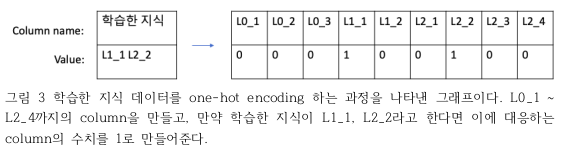

## Student data

Student code 별로 그룹화하여 1d data 생성  
knowledge level의 개수만큼 데이터를 잘라서 1d data 생성  
만약 어떤 student code의 데이터가 knowledge level의 개수보다 많다면, 데이터를 9개씩 잘라서 집어넣음



In [23]:
start_st_input_time = time.time()

for block in layer_info.keys():
    for middle_chapter in layer_info[block]:
        for target_grade in data_index_info.keys():
            print("block: ", block)
            print("middle_chapter: ", middle_chapter)
            print("target_grade: ", target_grade)
                
            result_df = make_input_data(data = search(grade_datas[data_index_info[target_grade]],
                                                      search_columns = [["판본", "", "", ""], ["중단원", "", "", ""]],
                                                      filter_funcs = [lambda x: x == block, lambda x: x == middle_chapter]), 
                                        block = block,
                                        middle_chapter=middle_chapter)
            
            
            result_df.to_excel(excel_writer = os.path.join(preprocessed_dir_path,
                                                           str_join([
                                                               data_prefix(),
                                                               "판본", 
                                                                                   block, 
                                                                                   "중단원", 
                                                                                   str(middle_chapter), 
                                                                                   target_grade, 
                                                                                   "student_input.xlsx"])), 
                               sheet_name="data")

end_st_input_time = time.time()

block:  RJ
middle_chapter:  2204A100
target_grade:  1 grade
 
 
 
 
 
 
 
 
 
 
 
 
 
processing:  0 / 480.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

KeyboardInterrupt: 

# Load Student Data

In [12]:
layer_info = load_layer_info(prefix(target_block, target_middle_chapter))

higher_layer_info = get_higher_layer_info(layer_info, target_block, target_middle_chapter)
target_train_layers = higher_layer_info[target_block][target_middle_chapter]

data_index_info = data_raw_including_path_index_info

NameError: name 'prefix' is not defined

In [25]:
st_input_info = load_student_info(layer_info, data_index_info)

# Traing data

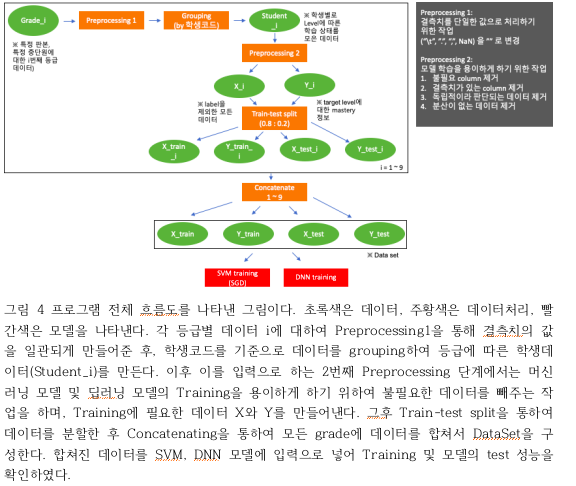

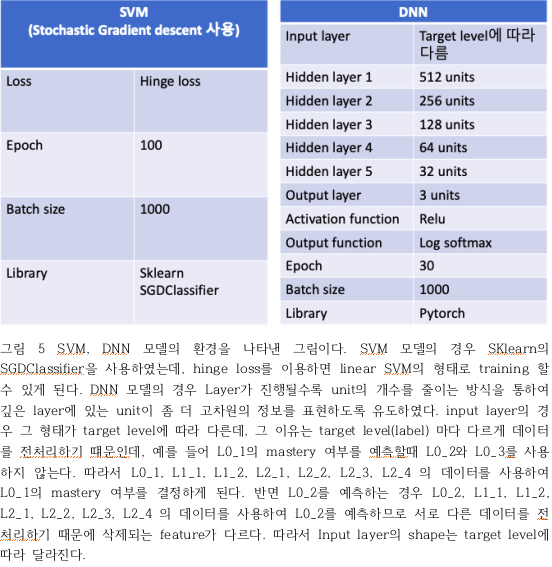

In [26]:
start_proc_dataset_time = time.time()
datasets = proc_dataset(st_input_info, target_train_layers)

print(time.time() - start_proc_dataset_time)

remove  L0_1 ['(S1+S2+S3+K1) 출제횟수', '', '', '']
remove  L0_1 ['(S1+S2+S3+K1) 정답수', '', '', '']
remove  L0_1 ['(S1+S2+S3+K1) 정답율', '', '', '']
remove  L0_1 ['(S1+S2+S3+K1+L1) 출제횟수', '', '', '']
remove  L0_1 ['(S1+S2+S3+K1+L1) 정답수', '', '', '']
remove  L0_1 ['(S1+S2+S3+K1+L1) 정답율', '', '', '']
remove  L0_1 ['개념원리정답율', '', '', '']
remove  L0_1 ['개념적용정답율', '', '', '']
remove  L0_1 ['개념활용정답율', '', '', '']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '출제횟수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '정답수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념적용(B)', '출제횟수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념적용(B)', '정답수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념활용(C)', '출제횟수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념활용(C)', '정답수']
remove  L0_2 ['(S1+S2+S3+K1) 출제횟수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1) 정답수', '', '', '']
remove

remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '정답수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념적용(B)', '출제횟수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념적용(B)', '정답수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념활용(C)', '출제횟수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념활용(C)', '정답수']
remove  L0_2 ['(S1+S2+S3+K1) 출제횟수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1) 정답수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1) 정답율', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1+L1) 출제횟수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1+L1) 정답수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1+L1) 정답율', '', '', '']
remove  L0_2 ['개념원리정답율', '', '', '']
remove  L0_2 ['개념적용정답율', '', '', '']
remove  L0_2 ['개념활용정답율', '', '', '']
remove  L0_2 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '출제횟수']
remove  L0_2 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '정답수']
remove  L0_2 ['LEAR

remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '습(S1)', '개념원리(E)', '출제횟수')
remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '습(S1)', '개념활용(C)', '정답수')
remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '습(S1)', '개념활용(C)', '출제횟수')
remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '연(S2)', '개념원리(E)', '정답수')
remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '연(S2)', '개념원리(E)', '출제횟수')
remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '연(S2)', '개념적용(B)', '정답수')
remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '연(S2)', '개념적용(B)', '출제횟수')
remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '측(S3): 자료전달(지식별 문항수)', '개념원리(E)', '정답수')
remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '측(S3): 자료전달(지식별 문항수)', '개념원리(E)', '출제횟수')
remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '측(S3): 자료전달(지식별 문항수)', '개념적용(B)', '정답수')
remove nonDistcolumn:  ('L0_1', 'Cognitive Domain', '측(S3): 자료전달(지식별 문항수)', '개념적용(B)', '출제횟수')
remove nonDistcolumn:  ('L1_1', 'Cognitive Domain', '습(S1)', '개념원

remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '정답수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념적용(B)', '출제횟수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념적용(B)', '정답수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념활용(C)', '출제횟수']
remove  L0_1 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념활용(C)', '정답수']
remove  L0_2 ['(S1+S2+S3+K1) 출제횟수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1) 정답수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1) 정답율', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1+L1) 출제횟수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1+L1) 정답수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1+L1) 정답율', '', '', '']
remove  L0_2 ['개념원리정답율', '', '', '']
remove  L0_2 ['개념적용정답율', '', '', '']
remove  L0_2 ['개념활용정답율', '', '', '']
remove  L0_2 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '출제횟수']
remove  L0_2 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '정답수']
remove  L0_2 ['LEAR

remove  L0_2 ['(S1+S2+S3+K1+L1) 출제횟수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1+L1) 정답수', '', '', '']
remove  L0_2 ['(S1+S2+S3+K1+L1) 정답율', '', '', '']
remove  L0_2 ['개념원리정답율', '', '', '']
remove  L0_2 ['개념적용정답율', '', '', '']
remove  L0_2 ['개념활용정답율', '', '', '']
remove  L0_2 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '출제횟수']
remove  L0_2 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념원리(E)', '정답수']
remove  L0_2 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념적용(B)', '출제횟수']
remove  L0_2 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념적용(B)', '정답수']
remove  L0_2 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념활용(C)', '출제횟수']
remove  L0_2 ['LEARNING BASED AI(L1) (Small Step 지식별 문항수)', '', '개념활용(C)', '정답수']
proc: . -> -1 ('L0_2', 'studied L0_2', '', '', '')
fill na:  L1_1 / 개념원리정답율
fill na:  L1_1 / 개념적용정답율
fill na:  L1_1 / 개념활용정답율
drop na:  MultiIndex([], )
remove  L0_1 ['(S1+S2+S3+K1) 출제횟수', '', '', '']
remove  L0_1 ['(S1+S2+S3+K1) 정답수', '', '',

# Examine train data

Unique labels:  [0 1 2]
ratio:  [0.4446875, 0.43635416666666665, 0.11895833333333333]


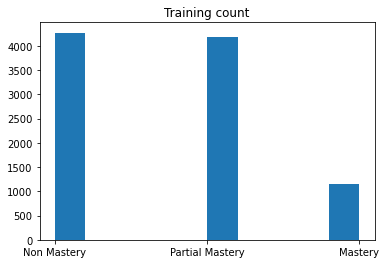

In [27]:
training_count(datasets, "L0_1")

# SGD Classifier

In [28]:
for target_layer in target_train_layers:
    model_prefix = datasets[target_layer]["prefix"]
    
    x_train_data = datasets[target_layer]["x_train"]
    x_test_data = datasets[target_layer]["x_test"]
    y_test_data = datasets[target_layer]["y_test"]
    y_train_data = datasets[target_layer]["y_train"]
    
    m = sj_ml.ExecModel(SGD_C(np.unique(y_train_data)), 
                        "SGD", 
                        log_dir_path = log_dir_path,
                        prefix = model_prefix)

    def save_SGD(ep):
        sj_file_system.save(m.model, 
                            os.path.join(os.path.join(model_dir_path, "SVM"), 
                                         "basic" + "_ep_" + str(ep) + "_" + m.save_file_name))

    m.set_save_proc(save_SGD)

    m.set_pf_params(epoch = 200, batch_size = 1000)

    m.set_data(X_train = x_train_data, 
               X_test = x_test_data, 
               y_train = y_train_data, 
               y_test = y_test_data)

    m.fit(is_logging=True)

    # Save Columns over training
    sj_file_system.save(m.X_train.columns, 
                        os.path.join(prj_info.prj_home_path, "columns", prefix(target_block, target_middle_chapter, target_layer) + "_columns"))
    
    # save model
    sj_file_system.save(m, 
                        os.path.join(os.path.join(model_dir_path, "SGD"), 
                                     m.save_file_name))


Model Name:  SGD
is_shuffle True
this model is fitted by partial!!
epoch:  200 batch_size 1000
just set
fit start!
ep:  10 0.6558333333333334
ep:  20 0.6560416666666666
ep:  30 0.7911458333333333
ep:  40 0.7846875
ep:  50 0.8053125
ep:  60 0.7233333333333334
ep:  70 0.6194791666666667
ep:  80 0.7523958333333334
ep:  90 0.7051041666666666
ep:  100 0.6132291666666667
ep:  110 0.7960416666666666
ep:  120 0.8176041666666667
ep:  130 0.7461458333333333
ep:  140 0.6878125
ep:  150 0.7472916666666667
ep:  160 0.7734375
ep:  170 0.7780208333333334
ep:  180 0.8323958333333333
ep:  190 0.7720833333333333
a
Model Name:  SGD
is_shuffle True
this model is fitted by partial!!
epoch:  200 batch_size 1000
just set
fit start!
ep:  10 0.7775
ep:  20 0.7482291666666666
ep:  30 0.8115625
ep:  40 0.8041666666666667
ep:  50 0.75875
ep:  60 0.8251041666666666
ep:  70 0.5994791666666667
ep:  80 0.8142708333333334
ep:  90 0.7994791666666666
ep:  100 0.7314583333333333
ep:  110 0.8369791666666667
ep:  120 0.78


# DNN

In [29]:
for target_layer in target_train_layers:
    model_prefix = datasets[target_layer]["prefix"]
    
    x_train_data = datasets[target_layer]["x_train"]
    x_test_data = datasets[target_layer]["x_test"]
    y_test_data = datasets[target_layer]["y_test"]
    y_train_data = datasets[target_layer]["y_train"]
    
    m = sj_ml.ExecModel(model = DNN(input_shape=x_train_data.shape[1], 
                                    output_shape=len(label_category.values()), 
                                    learning_rate=0.01, 
                                    is_gpu=True), 
                    name = "DNN", 
                    log_dir_path = log_dir_path, 
                    prefix = model_prefix)

    def save_DNN(ep):
        torch.save(m.model.to("cpu"), os.path.join(os.path.join(model_dir_path, "DNN"), 
                                         "basic" + "_ep_" + str(ep) + "_" + m.save_file_name))
        m.model.to(m.model.device)

    m.set_save_proc(save_DNN)

    m.set_pf_params(epoch=100, batch_size=1000)

    m.set_data(X_train=x_train_data, X_test=x_test_data,  y_train=y_train_data, y_test=y_test_data)
    m.fit(is_logging=True)

    m.X_train = m.X_train.to("cpu")
    m.X_test = m.X_test.to("cpu")
    m.y_train = m.y_train.to("cpu")
    m.y_test = m.y_test.to("cpu")

    torch.save(m, os.path.join(os.path.join(model_dir_path, "DNN"), 
                                     m.save_file_name))
    

Model Name:  DNN
is_shuffle True
this model is fitted by partial!!
epoch:  100 batch_size 1000
use_tensor
data -> gpu
fit start!
ep:  10 tensor(0.7943, device='cuda:0')
ep:  20 tensor(0.8591, device='cuda:0')
ep:  30 tensor(0.9323, device='cuda:0')
ep:  40 tensor(0.9317, device='cuda:0')
ep:  50 tensor(0.9321, device='cuda:0')
ep:  60 tensor(0.9518, device='cuda:0')
ep:  70 tensor(0.8775, device='cuda:0')
ep:  80 tensor(0.8920, device='cuda:0')
ep:  90 tensor(0.9593, device='cuda:0')
a
Model Name:  DNN
is_shuffle True
this model is fitted by partial!!
epoch:  100 batch_size 1000
use_tensor
data -> gpu
fit start!
ep:  10 tensor(0.7976, device='cuda:0')
ep:  20 tensor(0.6540, device='cuda:0')
ep:  30 tensor(0.7882, device='cuda:0')
ep:  40 tensor(0.9036, device='cuda:0')
ep:  50 tensor(0.9385, device='cuda:0')
ep:  60 tensor(0.8977, device='cuda:0')
ep:  70 tensor(0.9489, device='cuda:0')
ep:  80 tensor(0.9380, device='cuda:0')
ep:  90 tensor(0.9271, device='cuda:0')
a


# Deployment

In [34]:
dnn_path = os.path.join(model_dir_path, "DNN")
sgd_path = os.path.join(model_dir_path, "SGD")
    
# Load DNN
DNN_models = []
for target_layer in target_train_layers:
    file_name = str_join([prefix(target_block, target_middle_chapter, target_layer), "grade_0_sampling_False", "DNN"])
    
    DNN_m = torch.load(os.path.join(dnn_path, file_name), map_location = torch.device('cpu'))
    optim_DNN = torch.load(os.path.join(dnn_path, str_join(["basic", "ep", str(np.argmax(list(map(lambda x: float(x), DNN_m.test_acc["ep_test_acc"]))) + 1), file_name])), map_location = torch.device('cpu'))
    optim_DNN.eval()
    DNN_m.model = optim_DNN
    
    DNN_models.append(DNN_m)

# Load SVM
SGD_models = []
for target_layer in target_train_layers:
    file_name = str_join([prefix(target_block, target_middle_chapter, target_layer), "grade_0_sampling_False", "SGD"])
    
    SGD_m = sj_file_system.load(os.path.join(sgd_path, file_name))
    optim_SGDC = sj_file_system.load(os.path.join(model_dir_path, "SVM", str_join(["basic", "ep", str(str(np.argmax(SGD_m.test_acc["ep_test_acc"]) + 1)), SGD_m.save_file_name])))
    SGD_m.model = optim_SGDC

    SGD_models.append(SGD_m)
    
# Load columns over training
columns = []
for i in range(0, len(target_train_layers)):
    target_layer = target_train_layers[i]
    
    columns.append(sj_file_system.load(os.path.join(prj_info.prj_home_path, "columns", prefix(target_block, target_middle_chapter, target_layer) + "_columns")))

FileNotFoundError: [Errno 2] No such file or directory: '/home/seojin/HR/student_data_analysis/DNN/BS_BS_14048100_L0_1_removeS_grade_0_sampling_False_DNN'

# Model evaluation

<Figure size 432x288 with 0 Axes>

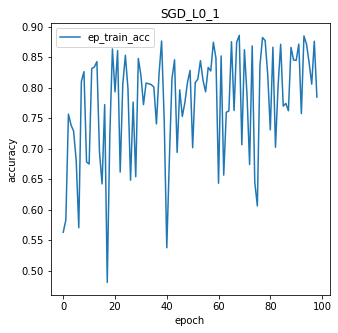

<Figure size 432x288 with 0 Axes>

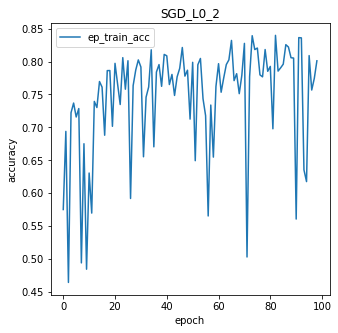

<Figure size 432x288 with 0 Axes>

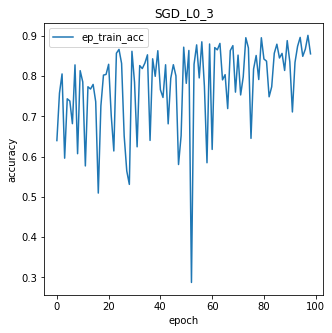

In [27]:
for i in range(len(SGD_models)):
    draw_accuracy(model=SGD_models[i], acc_type="ep_train_acc")

<Figure size 432x288 with 0 Axes>

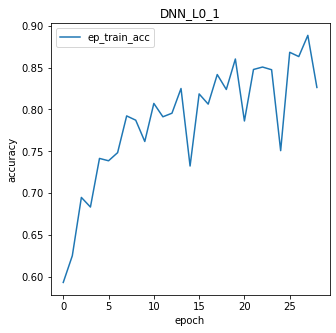

<Figure size 432x288 with 0 Axes>

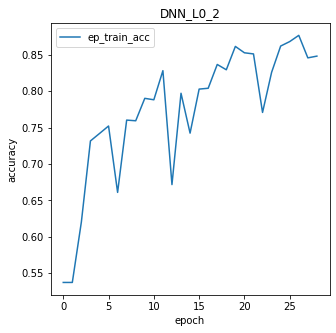

<Figure size 432x288 with 0 Axes>

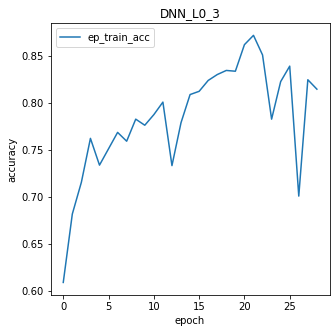

<Figure size 432x288 with 0 Axes>

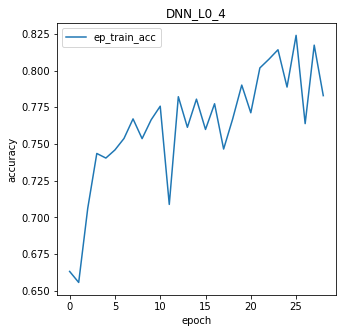

<Figure size 432x288 with 0 Axes>

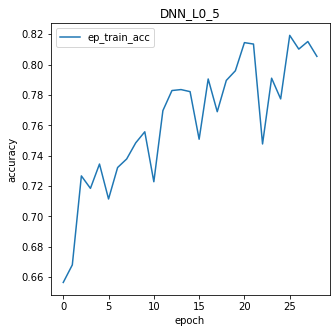

<Figure size 432x288 with 0 Axes>

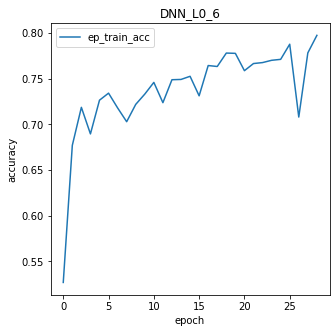

In [53]:
for i in range(len(DNN_models)):
    draw_accuracy(model=DNN_models[i], acc_type="ep_train_acc")

# Studied analysis

학습 path를 분석

1,2,3 등급의 경우 Mastery를 하기위한 학습 path의 패턴이 무엇인지 조사하였으며 그외의 등급의 경우 Mastery 및 Partial Mastery를 위한 path의 패턴이 무엇인지 조사하였다.

알고리즘은 다음과 같다.

최적 패턴 분석 - 

1. 테스트 데이터에 대하여 Mastery 여부를 예측한다.
2. Mastery로 예측된 모든 데이터에 대하여 학습한 지식을 뽑아낸다.  *4~9등급의 경우 Mastery가 없다면 Partial Mastery를 예측한다.
3. 학습한 지식의 분포를 계산한 후, 가장 빈도가 큰 학습 패턴(학습한 지식)을 출력한다.
4. 만약 최적 패턴이 없다면, 상위 등급의 최적 학습 패턴을 최적 학습 패턴으로 한다.(Mastery가 없는 경우)

차선 패턴 분석 - 

1. 테스트 데이터에 대하여 Mastery 여부를 예측한다.
2. Mastery로 예측된 모든 데이터에 대하여 학습한 지식을 뽑아낸다.  *4~9등급의 경우 Mastery가 없다면 Partial Mastery를 예측한다.
3. 학습한 지식의 분포를 계산한 후, 두번째로 빈도가 큰 학습 패턴(학습한 지식)을 출력한다.
4. 만약 최적 패턴이 없다면, 상위 등급의 최적 학습 패턴을 최적 학습 패턴으로 한다.(Mastery가 없는 경우)

추천 패턴 분석 - 

1. 상위 등급의 최적 학습 pattern을 추천 학습 패턴으로 한다.

In [1]:
sorted_knowledge = sort_knowledge_level(list(layer_info[target_block][target_middle_chapter].keys()))

result_L, studied_L = grade_path(test_data=SGD_models[0].X_test, model_type="SGD", target_v = "L0_1")

result_L

NameError: name 'sort_knowledge_level' is not defined

# SVM Coefficient

어떤 feature가 predict에 큰 영향을 주는지 분석

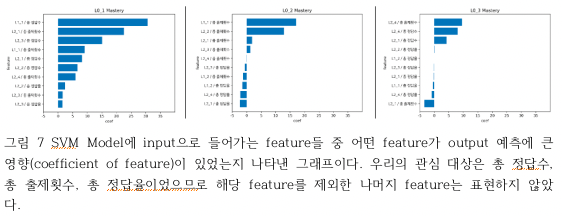

## Mastery


Mastery /////////////////////////////////////////////////////////
order: 0 / L1_1 / 총 정답수
order: 1 / L1_3 / 총 정답수
order: 2 / L1_4 / 총 정답수
order: 3 / L2_1 / 총 정답수
order: 4 / L2_1 / 총 출제횟수
order: 5 / L2_6 / 총 정답수
order: 6 / L2_1 / 총 정답율
order: 7 / L1_1 / 총 정답율
order: 8 / L2_3 / 총 정답율
order: 9 / L1_3 / 총 정답율
['L1_1 / 총 정답수', 'L1_3 / 총 정답수', 'L1_4 / 총 정답수', 'L2_1 / 총 정답수', 'L2_1 / 총 출제횟수', 'L2_6 / 총 정답수', 'L2_1 / 총 정답율', 'L1_1 / 총 정답율', 'L2_3 / 총 정답율', 'L1_3 / 총 정답율']


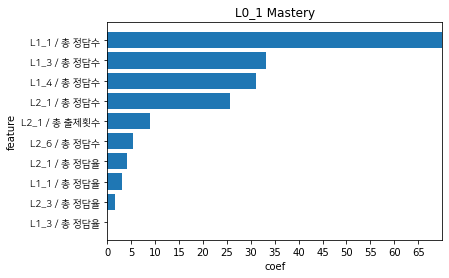

In [29]:
show_result(model=SGD_models[0], 
            target_high_feature_range=range(0,10), 
            target_mastery_index=label_category["Mastery"], 
            target_layer = "L0_1",
           xmin=0,
           xmax=70)

# Sub study path

In [86]:
# sub study path
target_sub_columns_names = ["개념원리정답율", "개념적용정답율", "개념활용정답율"] # 반드시 순서가 쉬움 -> 어려움순이어야함
alias_sub_column_name = ["C1", "C2", "C3"]

print("Target: L0_3\n")

get_sub_study_path(SGD_models[0], target_sub_columns_names, alias_sub_column_name)

Target: L0_3

L2_8 / C2 -> C3 ;
L2_7 / C2 -> C3 ;
L2_6 / C3 ;
L2_5 / C2 -> C3 ;
L2_4 / C1 -> C2 -> C3 ;
L2_3 / C3 ;
L2_2 / C2 -> C3 ;
L2_1 / C3 ;
L1_5 / C2 -> C3 ;
L1_4 / C2 -> C3 ;
L1_3 / C2 -> C3 ;
L1_2 / C2 -> C3 ;
L1_1 / C1 -> C2 -> C3 ;


({'L2_8': {'개념원리정답율': 0.8155674487123008,
   '개념적용정답율': 6.608022871850416,
   '개념활용정답율': 5.126901010661363},
  'L2_7': {'개념원리정답율': 2.465967718941265,
   '개념적용정답율': 6.588757499046241,
   '개념활용정답율': 6.46160603853825},
  'L2_6': {'개념원리정답율': -1.1776109034909722e-13,
   '개념적용정답율': 2.5751381648317806,
   '개념활용정답율': 3.6857226890863677},
  'L2_5': {'개념원리정답율': 6.286933325113226,
   '개념적용정답율': 14.192157965781837,
   '개념활용정답율': 3.7594448490171612},
  'L2_4': {'개념원리정답율': 28.84026308793064,
   '개념적용정답율': 20.369920845004504,
   '개념활용정답율': 16.630126676247453},
  'L2_3': {'개념원리정답율': -9.709747893331343,
   '개념적용정답율': -6.9098470457833905,
   '개념활용정답율': 12.27872113886561},
  'L2_2': {'개념원리정답율': -3.9365578429974626,
   '개념적용정답율': 9.44003267407209,
   '개념활용정답율': -0.7300291934616052},
  'L2_1': {'개념원리정답율': -9.003350890509656,
   '개념적용정답율': 2.9732892027859195,
   '개념활용정답율': 10.848459861879771},
  'L1_5': {'개념원리정답율': 6.742880481480017,
   '개념적용정답율': 11.539958309733034,
   '개념활용정답율': 2.5429007743394965},
  'L1